In [2]:
import pandas as pd

ev_vehicle = pd.read_csv('/content/clean_ev_data.csv')
print(ev_vehicle.head())

   VIN (1-10)    Country       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [3]:
ev_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   Country                                            177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

ev_vehicle.isnull().sum()

/tmp/ipython-input-13-1241114480.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


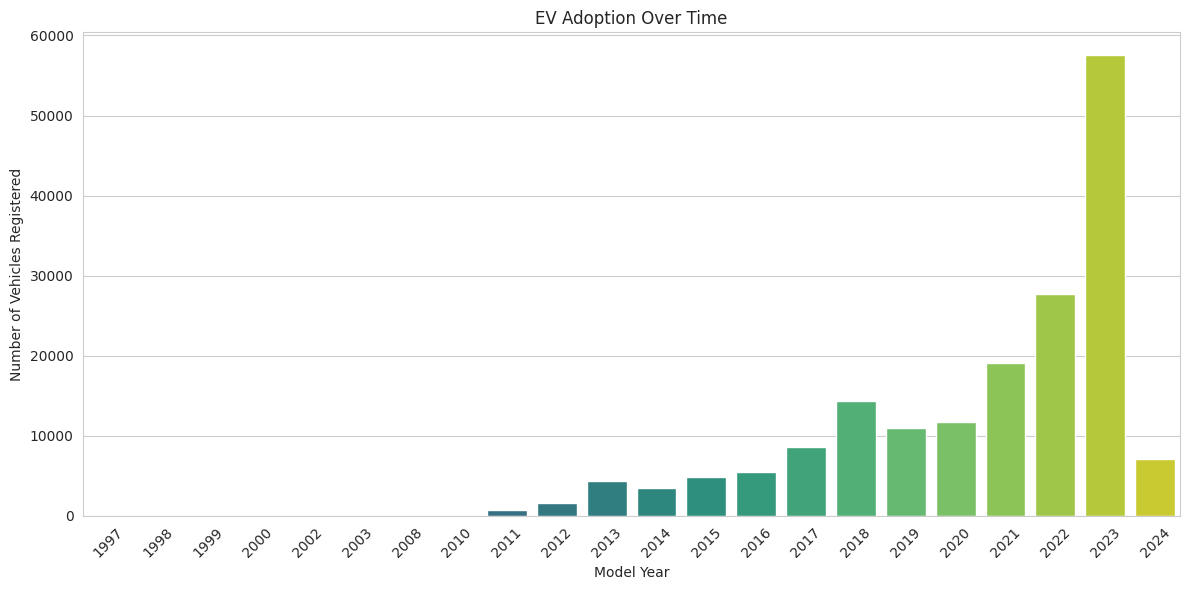

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_vehicle['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

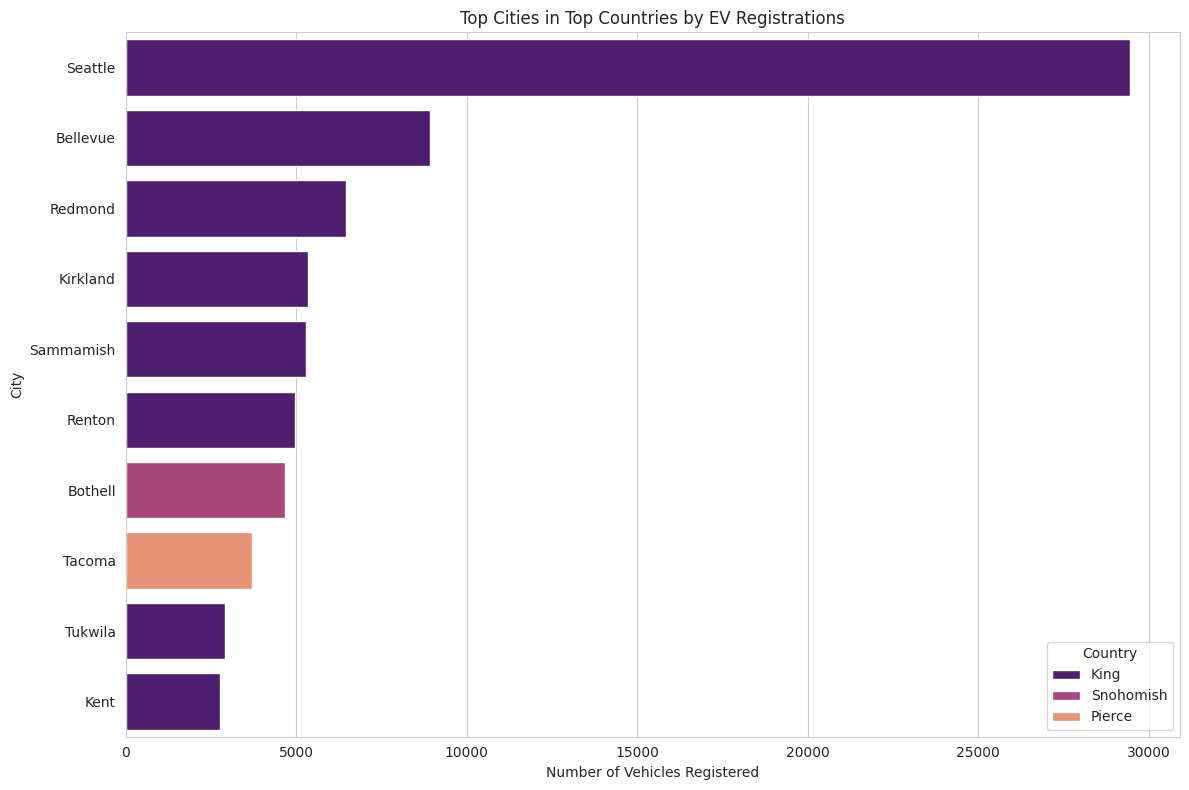

In [17]:
# Distribution at country level (based on 'Country' column)
ev_country_distribution = ev_vehicle['Country'].value_counts()
top_countries = ev_country_distribution.head(3).index

# Filter the dataset for these top countries
top_countries_data = ev_vehicle[ev_vehicle['Country'].isin(top_countries)]

# Analyze the distribution of EVs within the cities of these top countries
ev_city_distribution_top_countries = top_countries_data.groupby(['Country', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visualize the top 10 cities across these countries
top_cities = ev_city_distribution_top_countries.head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='Country', data=top_cities, palette="magma")
plt.title('Top Cities in Top Countries by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='Country')
plt.tight_layout()
plt.show()



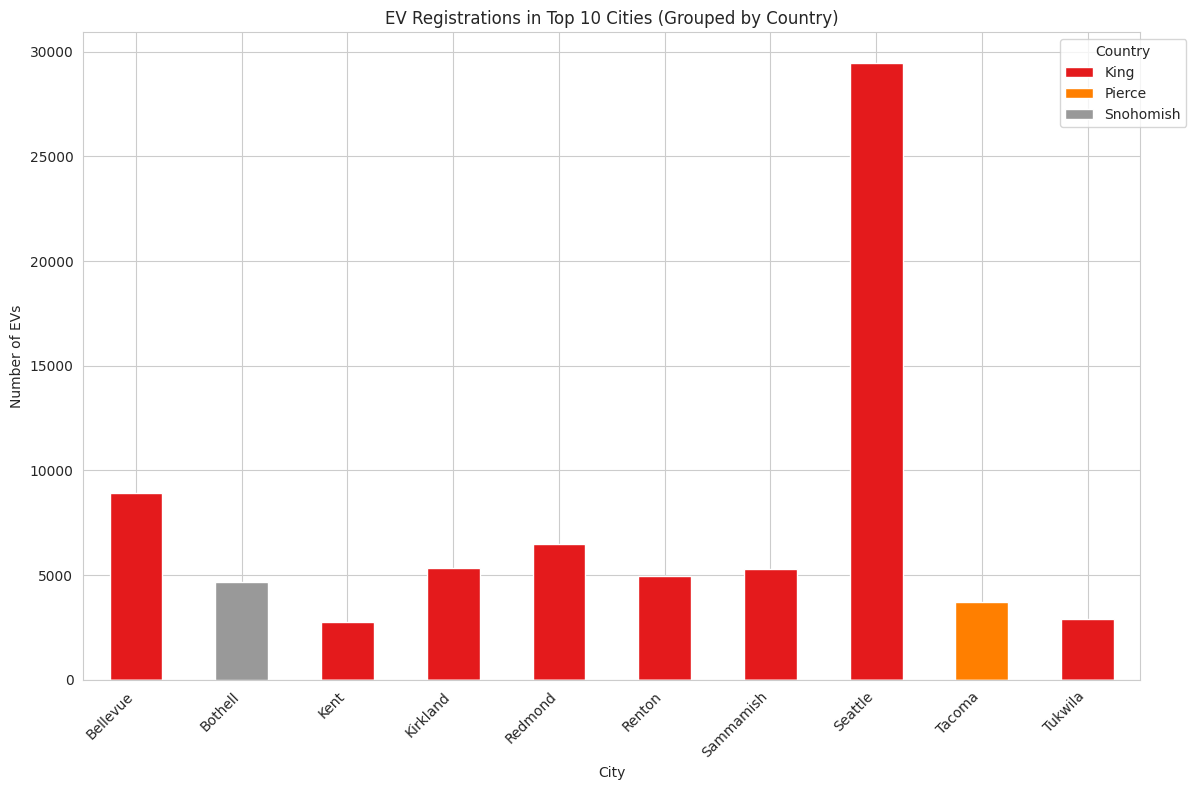

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Get top 3 countries by EV registrations
top_countries = ev_vehicle['Country'].value_counts().head(3).index

# Step 2: Filter the data for those countries
filtered_data = ev_vehicle[ev_vehicle['Country'].isin(top_countries)]

# Step 3: Group by Country and City, then count
city_counts = filtered_data.groupby(['Country', 'City']).size().reset_index(name='Vehicle Count')

# Step 4: Get top 10 cities overall
top_cities = city_counts.sort_values(by='Vehicle Count', ascending=False).head(10)

# Step 5: Pivot for stacked bar chart
pivot_data = top_cities.pivot(index='City', columns='Country', values='Vehicle Count').fillna(0)

# Step 6: Plot vertical stacked bar chart with Set1 colormap
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set1')

plt.title('EV Registrations in Top 10 Cities (Grouped by Country)')
plt.ylabel('Number of EVs')
plt.xlabel('City')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()




/tmp/ipython-input-30-2727215198.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="Dark2")


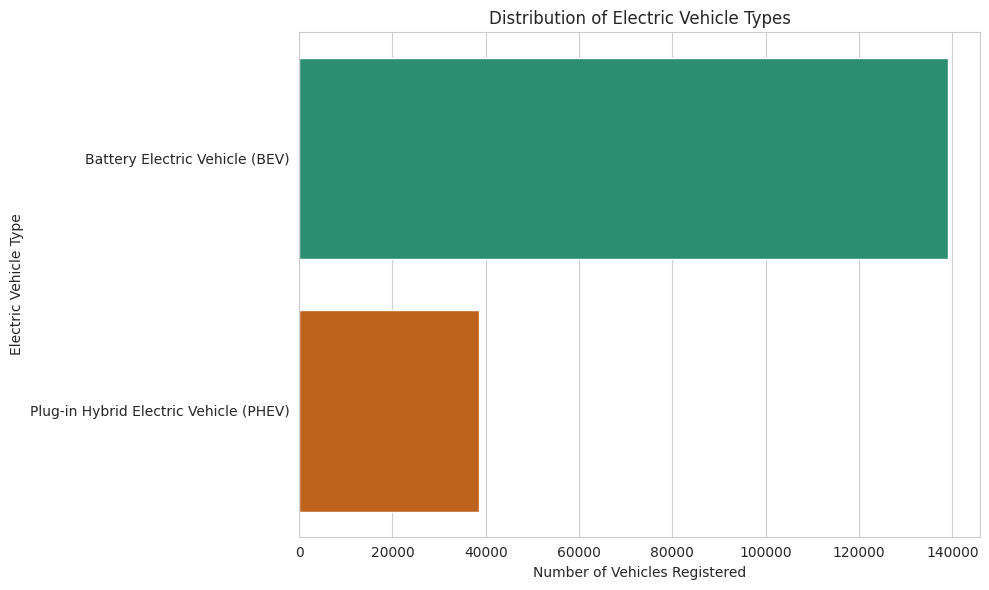

In [30]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_vehicle['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="Dark2")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

/tmp/ipython-input-31-1312483359.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="Set2")


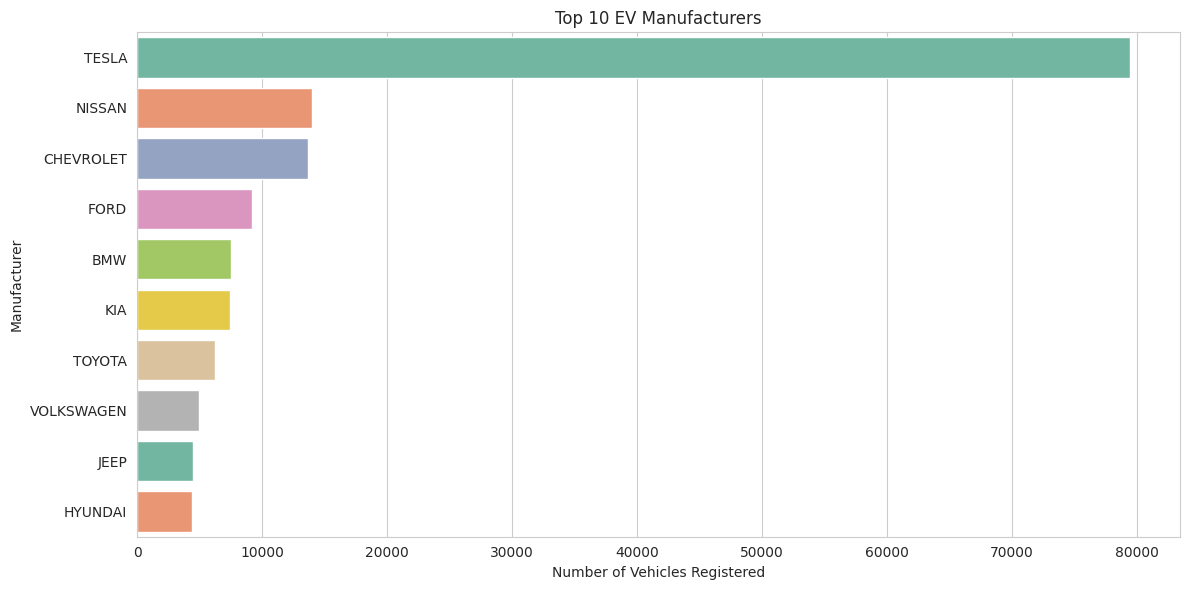

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 EV manufacturers by number of registrations
ev_make_distribution = ev_vehicle['Make'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="Set2")

plt.title('Top 10 EV Manufacturers')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()


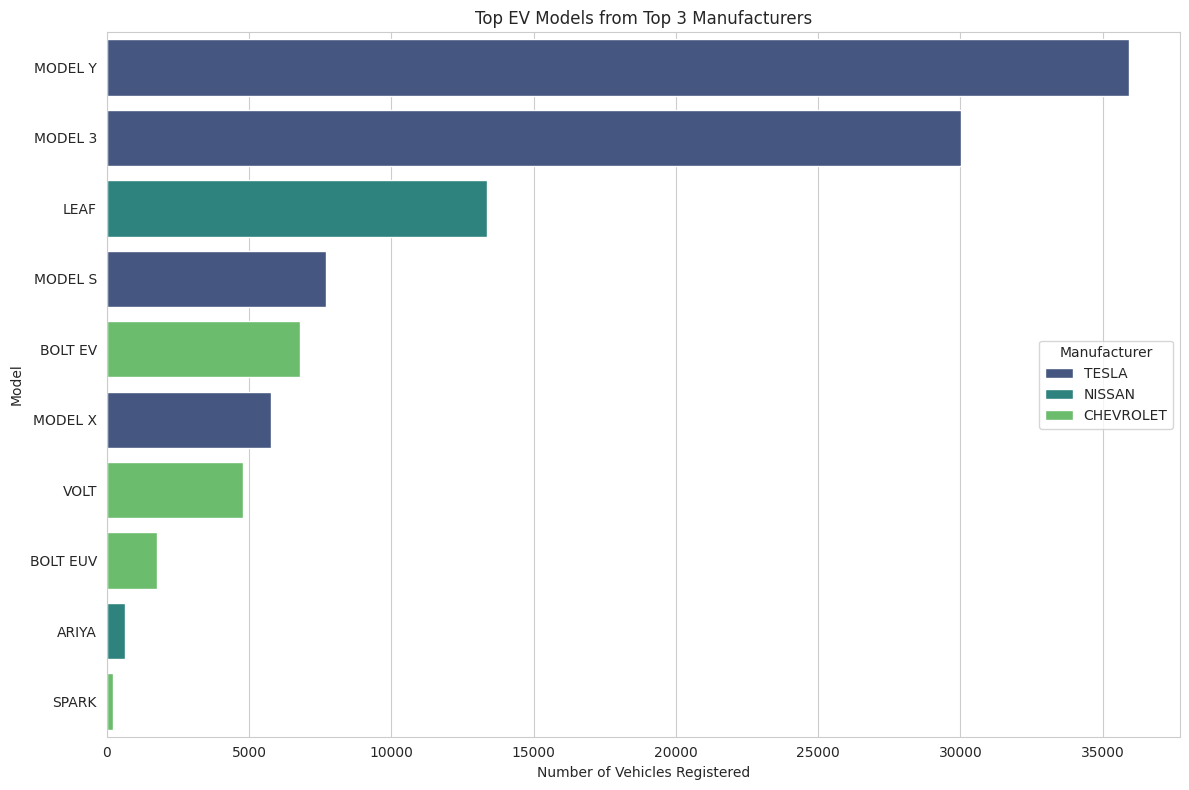

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get top 3 EV manufacturers
top_3_makes = ev_vehicle['Make'].value_counts().head(3).index

# Step 2: Filter data for top 3 makes
top_makes_data = ev_vehicle[ev_vehicle['Make'].isin(top_3_makes)]

# Step 3: Group by Make and Model, count vehicles
ev_model_distribution_top_makes = (
    top_makes_data.groupby(['Make', 'Model'])
    .size()
    .sort_values(ascending=False)
    .reset_index(name='Number of Vehicles')
)

# Step 4: Get top 10 models across these makes
top_models = ev_model_distribution_top_makes.head(10)

# Step 5: Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")

plt.title('Top EV Models from Top 3 Manufacturers')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Manufacturer', loc='center right')
plt.tight_layout()
plt.show()


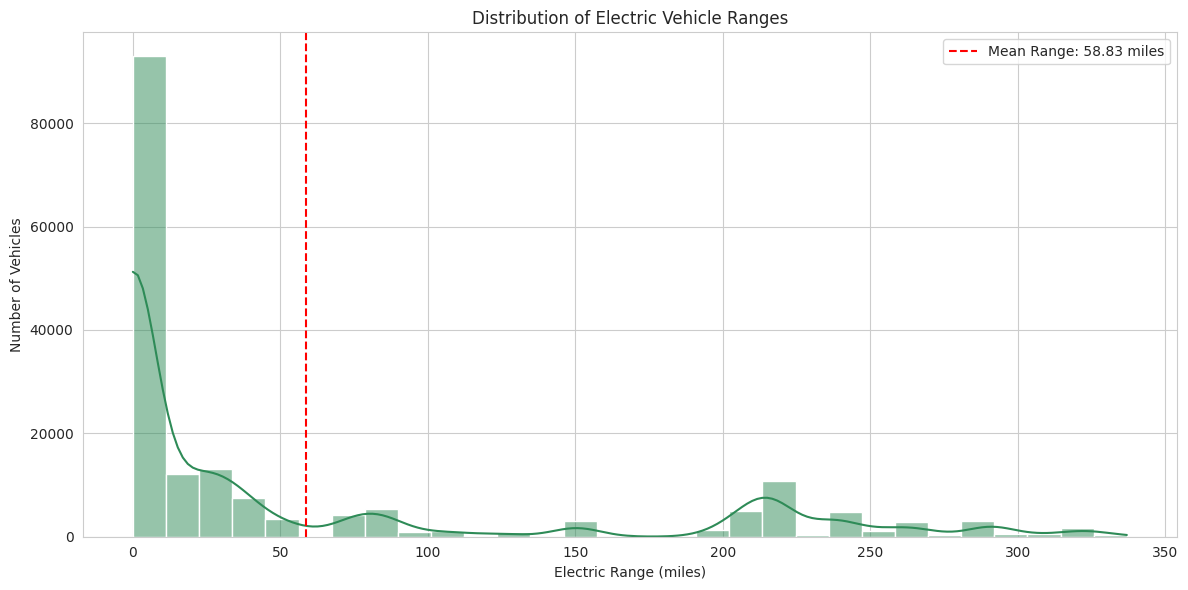

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Electric Range
plt.figure(figsize=(12, 6))
sns.histplot(ev_vehicle['Electric Range'], bins=30, kde=True, color='seagreen')

plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')

# Add a vertical line for the mean
mean_range = ev_vehicle['Electric Range'].mean()
plt.axvline(mean_range, color='red', linestyle='--', label=f'Mean Range: {mean_range:.2f} miles')

plt.legend()
plt.tight_layout()
plt.show()



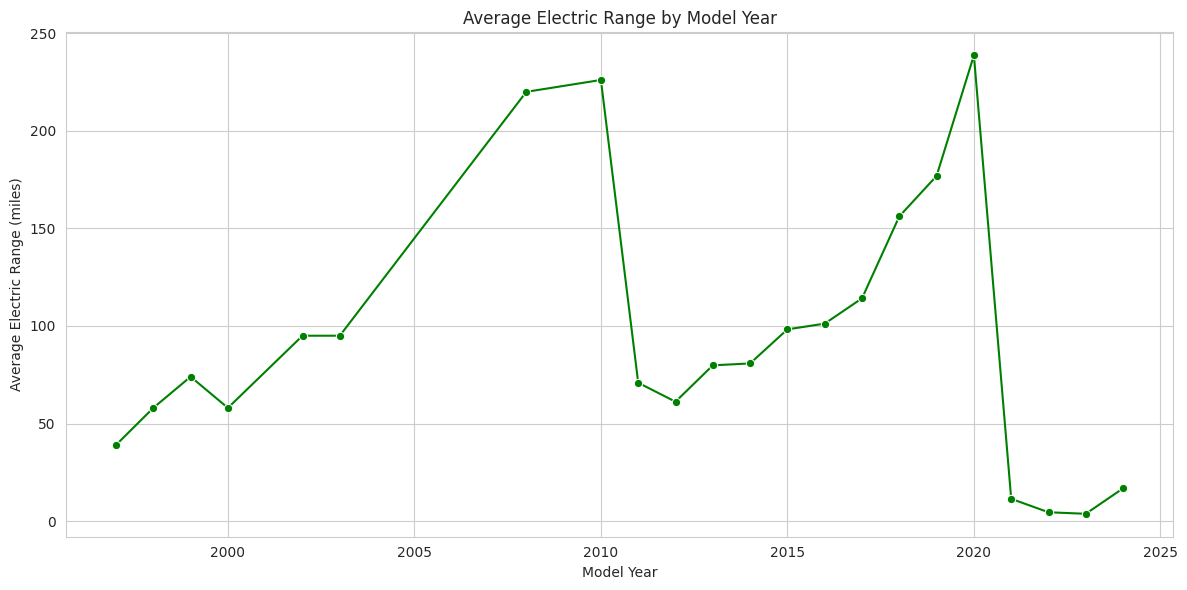

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average electric range by model year
average_range_by_year = ev_vehicle.groupby('Model Year')['Electric Range'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')

plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.tight_layout()
plt.show()


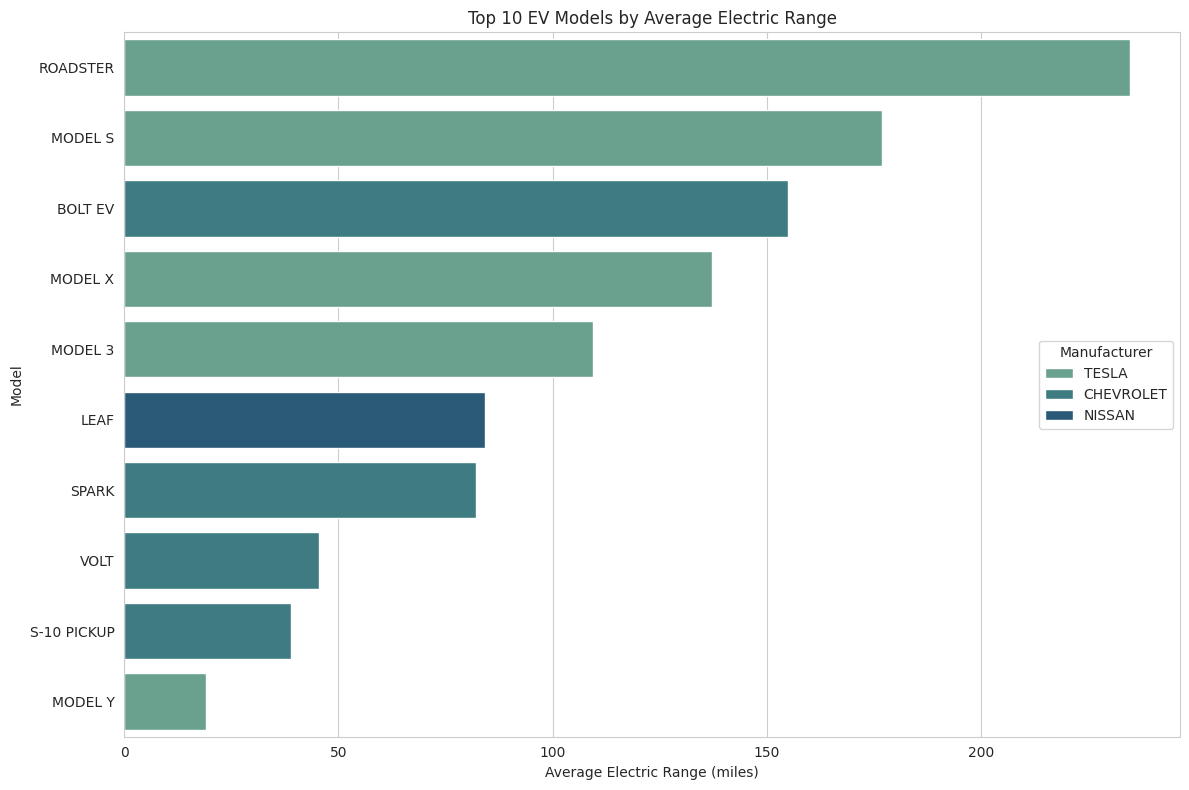

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average electric range by Make and Model
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'] \
    .mean().sort_values(ascending=False).reset_index()

# Select top 10 models with the highest average range
top_range_models = average_range_by_model.head(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Electric Range',
    y='Model',
    hue='Make',
    data=top_range_models,
    palette='crest'  # Changed from 'cool' to 'viridis' for better contrast
)

plt.title('Top 10 EV Models by Average Electric Range')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Manufacturer', loc='center right')
plt.tight_layout()
plt.show()


In [47]:
# Calculate the number of EVs registered each year (sorted by year)
ev_registration_counts = ev_vehicle.groupby('Model Year').size().reset_index(name='Number of Vehicles')
ev_registration_counts


,Model Year,Number of Vehicles
0,1997,1
1,1998,1
2,1999,5
3,2000,7
4,2002,2
5,2003,1
6,2008,19
7,2010,23
8,2011,775
9,2012,1614


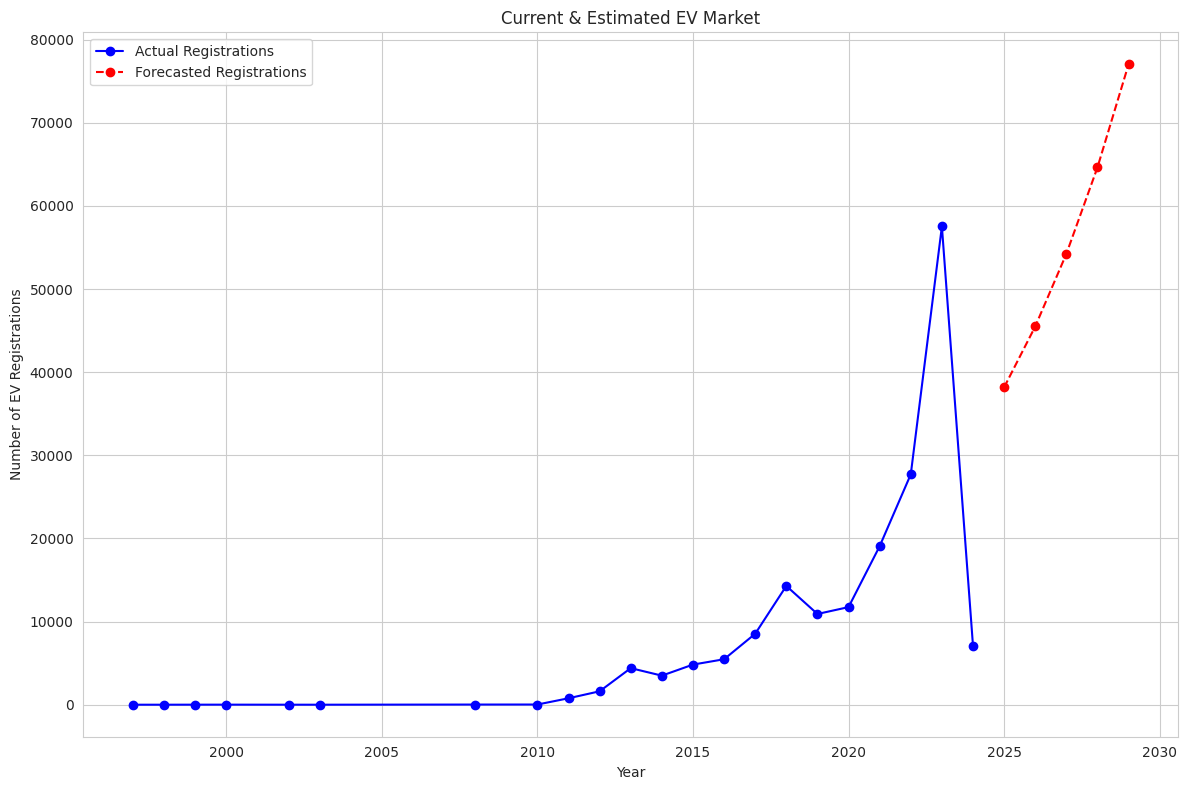

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Group data by 'Model Year' and count EV registrations
ev_yearly_data = ev_vehicle['Model Year'].value_counts().sort_index()
filtered_years = ev_yearly_data.loc[ev_yearly_data.index >= 1997]

# Prepare x and y for curve fitting
x = np.array(filtered_years.index)
x_offset = x - x.min()  # Normalize years to start from 0
y = np.array(filtered_years.values)

# Define exponential function
def exponential_growth(x, a, b):
    return a * np.exp(b * x)

# Fit curve to actual data
params, _ = curve_fit(exponential_growth, x_offset, y)

# Forecast for 2024 to 2029
forecast_years = np.arange(x.max() + 1, 2030)
forecast_x_offset = forecast_years - x.min()
forecasted_values = exponential_growth(forecast_x_offset, *params)

# Plot actual vs forecasted data
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo-', label='Actual Registrations')            # Blue solid line with circles
plt.plot(forecast_years, forecasted_values, 'ro--', label='Forecasted Registrations')  # Red dashed line with circles

# Plot settings
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>